# SIN Stock Trading Game

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import yfinance as yf
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from matplotlib.dates import DateFormatter

# Importing defined functions

from Functions import stock_df_create
from Functions import get_current_weights
from Functions import rebalance_portfolio
from Functions import additional_cash_investments

## 1 - Dataframe creation and stock selection

In [2]:
tkr_list = ['BTI', 'BYD', 'MO', 'SAM', 'STZ', 'LMT', 'LVS',
            'TAP', 'TDG', 'PEP', 'NOC', 'MGM', 'GD', 'BUD', 
            'BAESY', 'BDRBF', 'MNST', 'WYNN', 'RRR', 'RTX',
            'PM', 'CZR', 'HO.PA', 'RHM.DE', 'AIR', 'HEI', 'GTBIF',
            'CURLF', 'DKNG']

In [3]:
df = stock_df_create(tkr_list, start_date="2024-03-01", end_date="2024-04-01")
df.sort_values(by="TKR")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,TKR,LAST_PRRICE,MKT_CAP,W_RET,M_RET,LAST_PRICE
24,AIR,,2121020416,-0.063360,-0.101321,59.869999
14,BAESY,,52447600640,-0.002445,0.079545,69.349998
15,BDRBF,,4194511104,-0.014453,0.168026,42.959999
0,BTI,,68148895744,0.011609,0.024177,30.500000
13,BUD,,120087298048,0.025131,0.010138,60.779999
1,BYD,,6444597248,0.056829,0.037608,67.320000
27,CURLF,,3911817216,-0.001869,0.101031,5.340000
21,CZR,,9460962304,0.050685,0.018156,43.740002
28,DKNG,,21600491520,-0.052972,0.043189,45.410000
12,GD,,77506215936,0.004088,0.038757,282.489990


## 2 - Stock Weighting and Portfolio Construnction

### 2.1 Assigning Size and Momentum scores

In [4]:
scaler = MinMaxScaler()

market_cap_values = df['MKT_CAP'].values.reshape(-1, 1)
weekly_return_values = df['W_RET'].values.reshape(-1, 1)
monthly_return_values = df['M_RET'].values.reshape(-1,1)

df['Size_Score'] = scaler.fit_transform(market_cap_values)
df['W_Mom_Score'] = scaler.fit_transform(weekly_return_values)
df['M_Mom_Score'] = scaler.fit_transform(monthly_return_values)

### 2.2 Defining Scores Importance

In [5]:
mkt_cap_weight = 0.3
w_mom_weight = 0.3
m_mom_weight = 0.4

In [6]:
df['Overall_Score'] = (df['Size_Score'] * mkt_cap_weight) + (df['W_Mom_Score'] * w_mom_weight) + (df['M_Mom_Score'] * m_mom_weight)
df.sort_values(by="TKR")

,TKR,LAST_PRRICE,MKT_CAP,W_RET,M_RET,LAST_PRICE,Size_Score,W_Mom_Score,M_Mom_Score,Overall_Score
24,AIR,,2121020416,-0.063360,-0.101321,59.869999,0.000000,0.000000,0.000000,0.000000
14,BAESY,,52447600640,-0.002445,0.079545,69.349998,0.211073,0.496317,0.573287,0.441532
15,BDRBF,,4194511104,-0.014453,0.168026,42.959999,0.008696,0.398484,0.853742,0.463651
0,BTI,,68148895744,0.011609,0.024177,30.500000,0.276925,0.610825,0.397788,0.425440
13,BUD,,120087298048,0.025131,0.010138,60.779999,0.494759,0.720998,0.353288,0.506042
1,BYD,,6444597248,0.056829,0.037608,67.320000,0.018133,0.979265,0.440359,0.475363
27,CURLF,,3911817216,-0.001869,0.101031,5.340000,0.007511,0.501012,0.641389,0.409113
21,CZR,,9460962304,0.050685,0.018156,43.740002,0.030784,0.929204,0.378704,0.439478
28,DKNG,,21600491520,-0.052972,0.043189,45.410000,0.081698,0.084643,0.458048,0.233122
12,GD,,77506215936,0.004088,0.038757,282.489990,0.316171,0.549545,0.444001,0.437315


### 2.3 Portfolio Construction

In [7]:
df['Weights_new'] = df['Overall_Score'] / df['Overall_Score'].sum()

Optimal_new_weights = df[['TKR', 'Weights_new', 'LAST_PRICE']]
Optimal_new_weights.sort_values(by="TKR")

,TKR,Weights_new,LAST_PRICE
24,AIR,0.000000,59.869999
14,BAESY,0.033898,69.349998
15,BDRBF,0.035596,42.959999
0,BTI,0.032662,30.500000
13,BUD,0.038850,60.779999
1,BYD,0.036495,67.320000
27,CURLF,0.031409,5.340000
21,CZR,0.033740,43.740002
28,DKNG,0.017897,45.410000
12,GD,0.033574,282.489990


### 2.4 Visual Representation

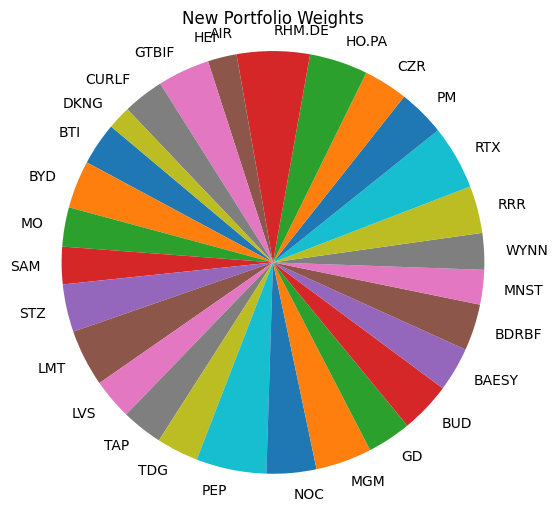

In [8]:
plt.figure(figsize=(6, 6))
plt.pie(Optimal_new_weights['Weights_new'], labels=Optimal_new_weights['TKR'], startangle=140)
plt.title('New Portfolio Weights')
plt.axis('equal') 

plt.show()

## 3 - Portfolio Rebalancing

In [10]:
Cur_port = pd.read_csv("OpenPosition_4_1_2024.csv", header=0)
Cur_port.rename(columns={'Symbol': 'TKR'}, inplace=True)
Cur_port

,TKR,Description,Quantity,Currency,LastPrice,PricePaid,DayChange,ProfitLoss,MarketValue,ProfitLossPercentage
0,AIR,European Aeronautic Defence and Space NV,36,EUR,170.72,166.180000,-0.88,163.44,6145.920000,2.73
1,BAESY,BAE Systems plc - ADR,644,USD,69.35,68.670776,-0.37,405.20,41371.918741,0.99
2,BDRBF,Bombardier Inc. - Ordinary Shares - Class B (S...,1348,USD,42.96,42.163917,-0.17,994.08,53644.783281,1.89
3,BTI,British American Tobacco Plc - ADR,1023,USD,30.50,30.985934,0.16,-460.50,28903.391353,-1.57
4,BUD,Anheuser-Busch In Bev SA/NV - ADR,327,USD,60.78,59.972110,-0.06,244.72,18411.186557,1.35
5,BYD,Boyd Gaming Corp.,382,USD,67.32,62.689110,0.90,"1,638.71",23822.141527,7.39
6,CURLF,Curaleaf Holdings Inc,7455,USD,5.34,5.140000,-0.16,"1,381.18",36877.564821,3.89
7,CZR,Caesars Entertainment Inc,780,USD,43.74,40.995000,0.38,"1,983.40",31604.339006,6.70
8,DKNG,DraftKings Inc - Ordinary Shares - Class A,1313,USD,45.41,44.895765,0.06,625.46,55231.845930,1.15
9,GD,General Dynamics Corp.,163,USD,282.49,278.144172,0.59,656.20,42654.417282,1.56


In [11]:
Cur_weights = get_current_weights(Cur_port)
Cur_weights = pd.DataFrame(Cur_weights.items(), columns=['TKR', 'Weights_cur'])
Cur_weights.loc[Cur_weights['TKR'] == 'HO', 'TKR'] = 'HO.PA'
Cur_weights.loc[Cur_weights['TKR'] == 'RHM', 'TKR'] = 'RHM.DE'
Cur_weights

,TKR,Weights_cur
0,AIR,0.005704
1,BAESY,0.041452
2,BDRBF,0.053749
3,BTI,0.028960
4,BUD,0.018447
5,BYD,0.023869
6,CURLF,0.036949
7,CZR,0.031666
8,DKNG,0.055339
9,GD,0.042737


In [12]:
trades, num_trades, traded_amount = rebalance_portfolio(Cur_weights, Optimal_new_weights, Cur_port)
print(f'To rebalace the portfolio {num_trades} trades will be needed, and a cash amount of {traded_amount} is necessary.')

To rebalace the portfolio 10 trades will be needed, and a cash amount of -63288.77874038048 is necessary.


In [13]:
trades

,TKR,Weights_cur,Weights_new,LAST_PRICE,Description,Quantity,Currency,LastPrice,PricePaid,DayChange,ProfitLoss,MarketValue,ProfitLossPercentage,DollarAmount,DollarAmount_cur,DollarAmount_new,DollarAmount_diff,Shares_to_trade
1,BAESY,0.041452,0.033898,69.349998,BAE Systems plc - ADR,644.0,USD,69.35,68.670776,-0.37,405.20,41371.918741,0.99,44661.40,44661.40,33233.468515,-11427.931485,-165.0
2,BDRBF,0.053749,0.035596,42.959999,Bombardier Inc. - Ordinary Shares - Class B (S...,1348.0,USD,42.96,42.163917,-0.17,994.08,53644.783281,1.89,57910.08,57910.08,34898.304183,-23011.775817,-536.0
4,BUD,0.018447,0.038850,60.779999,Anheuser-Busch In Bev SA/NV - ADR,327.0,USD,60.78,59.972110,-0.06,244.72,18411.186557,1.35,19875.06,19875.06,38089.059422,18213.999422,300.0
5,BYD,0.023869,0.036495,67.320000,Boyd Gaming Corp.,382.0,USD,67.32,62.689110,0.90,"1,638.71",23822.141527,7.39,25716.24,25716.24,35779.883338,10063.643338,149.0
8,DKNG,0.055339,0.017897,45.410000,DraftKings Inc - Ordinary Shares - Class A,1313.0,USD,45.41,44.895765,0.06,625.46,55231.845930,1.15,59623.33,59623.33,17546.713740,-42076.616260,-927.0
9,GD,0.042737,0.033574,282.489990,General Dynamics Corp.,163.0,USD,282.49,278.144172,0.59,656.20,42654.417282,1.56,46045.87,46045.87,32916.080113,-13129.789887,-46.0
17,MO,0.038462,0.030000,43.619999,Altria Group Inc.,950.0,USD,43.62,44.512105,-0.04,-785.08,38386.860705,-2.00,41439.00,41439.00,29412.576470,-12026.423530,-276.0
22,RRR,0.019377,0.036164,59.820000,Red Rock Resorts Inc - Ordinary Shares - Class A,349.0,USD,59.82,55.235960,0.06,"1,482.00",19339.496623,8.30,20877.18,20877.18,35455.342715,14578.162715,244.0
24,SAM,0.012432,0.028586,304.420013,"Boston Beer Co., Inc. - Ordinary Shares - Class A",44.0,USD,304.42,308.180000,-3.55,-153.25,12407.925818,-1.22,13394.48,13394.48,28025.605757,14631.125757,48.0
27,TDG,0.046867,0.032020,1231.599976,Transdigm Group Incorporated,41.0,USD,1231.60,1204.451220,-2.20,"1,031.12",46776.407815,2.25,50495.60,50495.60,31392.427005,-19103.172995,-16.0


In [15]:
merged_port = pd.merge(Cur_port, trades[['TKR', 'Shares_to_trade']], on='TKR', how='left')
merged_port['Shares_to_trade'].fillna(0, inplace=True)
merged_port['New_Quantity'] = merged_port['Quantity'] + merged_port['Shares_to_trade']

updated_portfolio = merged_port[['TKR', 'New_Quantity', 'LastPrice']]
updated_portfolio['DollarAmount'] = updated_portfolio['New_Quantity'] * updated_portfolio['LastPrice']
updated_portfolio['uptd_Weights'] = updated_portfolio['DollarAmount'] / updated_portfolio['DollarAmount'].sum()

updated_portfolio

/var/folders/bz/jsngdqs55xxdjx6nm7z430l00000gn/T/ipykernel_5601/2842246680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_portfolio['DollarAmount'] = updated_portfolio['New_Quantity'] * updated_portfolio['LastPrice']
/var/folders/bz/jsngdqs55xxdjx6nm7z430l00000gn/T/ipykernel_5601/2842246680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_portfolio['uptd_Weights'] = updated_portfolio['DollarAmount'] / updated_portfolio['DollarAmount'].sum()


,TKR,New_Quantity,LastPrice,DollarAmount,uptd_Weights
0,AIR,36.0,170.72,6145.92,0.006064
1,BAESY,479.0,69.35,33218.65,0.032774
2,BDRBF,812.0,42.96,34883.52,0.034416
3,BTI,1023.0,30.50,31201.50,0.030783
4,BUD,627.0,60.78,38109.06,0.037598
5,BYD,531.0,67.32,35746.92,0.035268
6,CURLF,7455.0,5.34,39809.70,0.039276
7,CZR,780.0,43.74,34117.20,0.033660
8,DKNG,386.0,45.41,17528.26,0.017293
9,GD,117.0,282.49,33051.33,0.032608


In [16]:
cash_rebalacing = additional_cash_investments(updated_portfolio, 60000)
cash_rebalacing

,TKR,Additional_Shares
0,AIR,2.0
1,BAESY,28.0
2,BDRBF,48.0
3,BTI,60.0
4,BUD,37.0
5,BYD,31.0
6,CURLF,441.0
7,CZR,46.0
8,DKNG,22.0
9,GD,6.0


### 3.1 - Rebalancing Drift

In [17]:
merged_df = pd.merge(Optimal_new_weights, updated_portfolio, on='TKR', suffixes=('_optimal', '_updated'))

mean_difference = np.mean(merged_df['Weights_new'] - merged_df['uptd_Weights'])

print(mean_difference)

-0.00017298997712437498


A rebalancing drift of 0.058% is neglectable in the context of our portfolio management, indicating only a minor deviation from the target allocation. By implementing a weekly rebalancing strategy, we ensure that the portfolio weights remain consistently close to the desired allocation. While some minor rebalancing drift is inevitable due to market fluctuations, the frequency of rebalancing helps mitigate the impact of these deviations over time. 

Rebalancing Drifts data:

* 1st week: 0.058%
* 2nd week: 0.017%

### 3.1 - Rebalancing Visualization

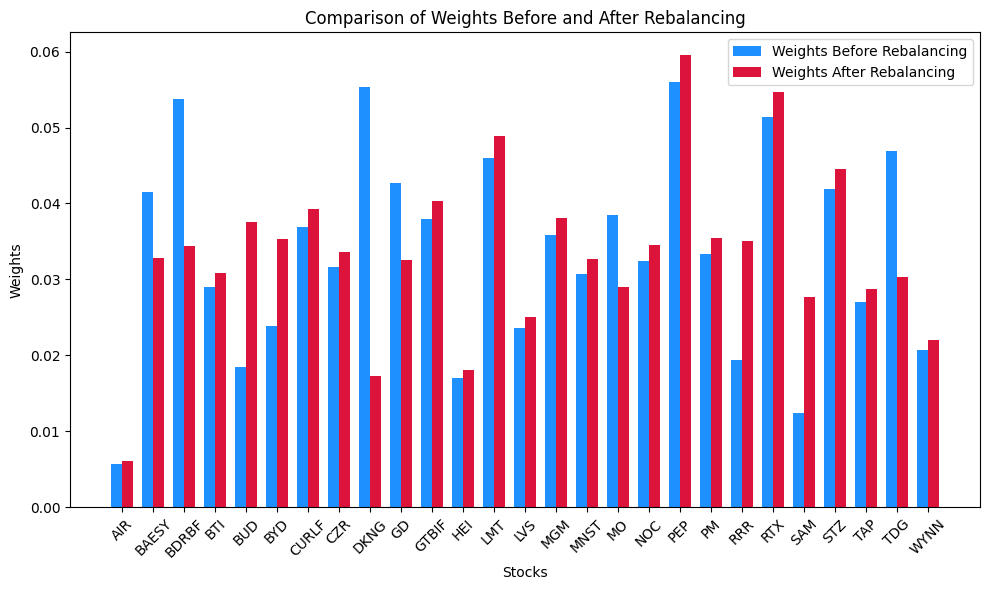

In [18]:
merged_weights = pd.merge(Cur_weights, updated_portfolio, on="TKR")

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(merged_weights))
tick_labels = merged_weights['TKR']

plt.bar(index, merged_weights['Weights_cur'], color='dodgerblue', width=bar_width, label='Weights Before Rebalancing')

plt.bar(index + bar_width, merged_weights['uptd_Weights'], color='crimson', width=bar_width, label='Weights After Rebalancing')

plt.xlabel('Stocks')
plt.ylabel('Weights')
plt.title('Comparison of Weights Before and After Rebalancing')
plt.xticks(index + bar_width / 2, tick_labels, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

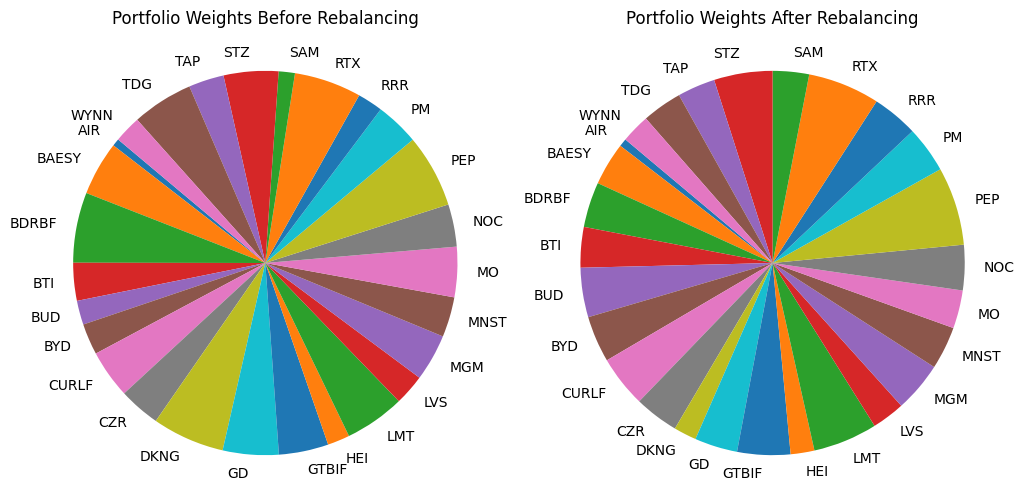

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(merged_weights['Weights_cur'], labels=merged_weights['TKR'], startangle=140)
axs[0].set_title('Portfolio Weights Before Rebalancing')
axs[0].axis('equal')

axs[1].pie(merged_weights['uptd_Weights'], labels=merged_weights['TKR'], startangle=140)
axs[1].set_title('Portfolio Weights After Rebalancing')
axs[1].axis('equal')

plt.show()

## 4 - Performance Evaluation

[*********************100%%**********************]  1 of 1 completed


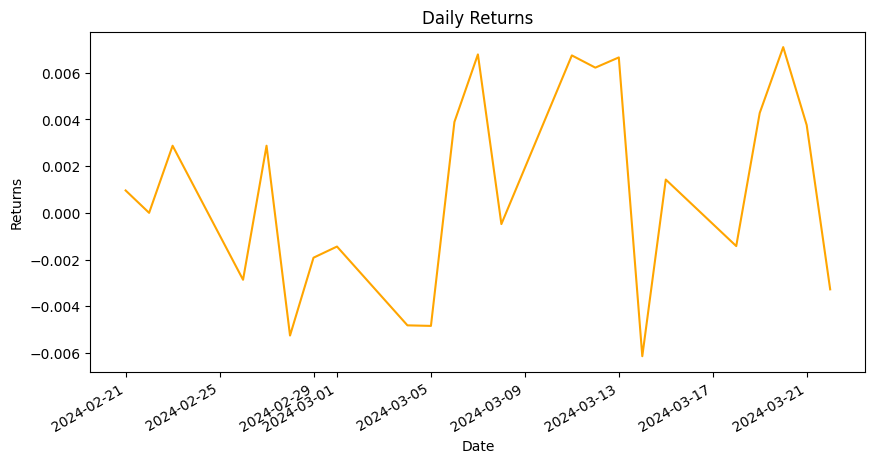

In [37]:
Benchmark = yf.download("VICEX", start="2024-02-19", end="2024-03-25") 
Benchmark['RET'] = Benchmark['Adj Close'].pct_change()

plt.figure(figsize=(10, 5))
plt.plot(Benchmark.index, Benchmark['RET'], color='orange', linestyle='-')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')

date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()  # Rotate x-axis labels

plt.show()